<a href="https://colab.research.google.com/github/junokreisler/SCellCnn/blob/master/Growth_curve_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Growth Curve Experiments

### **BEFORE RUNNING CODE: MAKE SURE YOU HAVE THE FOLDER `growth_curves_data` IN THE FILES PANE, CONTAINING 5 .CSV FILES:**
* `Time_Series_63_64.csv`
* `Time_Series_65.csv`
* `Dilution_Series_63.csv`
* `Dilution_Series_64.csv`
* `Dilution_Series_65.csv`

## Experiment 63 - *Lactobacillus crispatus* vs *E. coli* growth in LAPTg medium

### Material
* 18 Eppendorf tubes
* 128 dilution series tubes with Peptone and water
* 8 LAPTg and 8 LB plates,

### Steps
1. Prepare 18x 5ml Eppendorf tubes with Laptg
2. Transfer 25 microliters of lactobacilli overnight culture in 9 of the tubes, and 25 microliters of the e coli overnight culture in the other 9 tubes
3. When taking out: transfer 1ml of the tube to a cuvette, measure OD
Dilution series, plate (10 microliters of each dilution) and centrifuge rest of tube for 5 min at 10000 rpm
4. measure pH


### Incubation & test times
* Incubation: 6am
* Testing: 8am 10am 12pm 2pm 4pm 6pm 8pm 10pm

## Experiment 64

### Procedure
Repeat Experiment 63 with *E. coli* and *Lactobacillus crispatus*.

New colonies were incubated for the experiment to be repeated the day after, 2 of each:
* *E.coli* in LB
* *E. coli* in LAPTg pH 6.5
* *Lactobacillus* in LB
* *Lactobacillus* in LAPTg pH 6.5
* *Lactobacillus* in LAPTg pH 4.5.

No growth of *L. crispatus* again in LAPTg pH 4.5.

### Incubation & test times
* Incubation: 8:30am
* Testing: 10:30am 12:30pm 2:30pm 4:30pm 6:30pm 8:30pm 10:30pm

## Experiment 65 - *L. crispatus* vs. *L. gasseri* at pH 4.5, 6.5

Aim of the experiment - determination of growth rate of *L. crispatus* and *L. gasseri* at pH 4.5 and pH 6.5 in MRS medium.

### Procedure
* Seven 5mL eppendorf tubes were set up for each reaction condition and bacterial strain:
  * L. crispatus 4.5
  * L. Crispatus 6.5
  * L. gasseri 4.5
  * L. gasseri 6.5
* Fill tubes with 5mL MRS at appropriate pH
* Inoculate with 25uL of overnight culture
* Incubate at 37 °C  in shaker

Cultures were incubated at 18:30 on 10.09.23.

## Loading and formatting the data

In [2]:
def load_and_format_ts(filename): # format data for timeseries
    df = pd.read_csv(filename).T
    df.columns = df.iloc[0]
    df = df.reset_index().drop(index = 0, axis = 0).astype(float).rename(columns={'index': 'time since incubation for OD/pH meas., h'})
    return df

def load_and_format_multiple_ds(filename): # format data for dilution series
    df = pd.read_csv(filename, header=0).T.reset_index().T
    df.columns = df.iloc[0]
    df[['Hour', 'Dilution']] = df['Culture'].str.split('_', expand=True)
    df = df.drop('Culture', axis = 1).drop(df.index[0]).astype(float)
    return df

TS_63_64 = load_and_format_ts('growth_curves_data/Time_Series_63_64.csv')

# Remove failed measurements in experiments 63,  64
TS_63_64 = TS_63_64.drop(list(TS_63_64.filter(regex='fail')), axis = 1)

TS_65 = load_and_format_ts('growth_curves_data/Time_Series_65.csv')
DS_63 = load_and_format_ts('growth_curves_data/Dilution_Series_63.csv')
DS_64 = load_and_format_multiple_ds('growth_curves_data/Dilution_Series_64.csv')
DS_65 = load_and_format_multiple_ds('growth_curves_data/Dilution_Series_65.csv')

TS_63_64

t_since_incubation,"time since incubation for OD/pH meas., h",63_OD_EC,63_pH_EC,64_OD_AL,64_OD_AE,64_OD_CL,64_OD_CE,64_pH_AL,64_pH_AE,64_pH_CL,64_pH_CE
1,2.0,0.014,4.56,0.133,0.155,0.235,0.274,5.97,5.95,6.38,6.50
2,4.0,0.041,4.61,0.703,0.616,0.678,0.732,5.66,5.66,6.13,6.18
3,6.0,0.092,4.75,1.158,1.018,0.858,1.045,5.30,5.31,6.23,6.29
4,8.0,0.197,4.82,1.207,1.077,0.862,1.032,5.10,5.11,6.29,6.32
5,10.0,0.275,4.84,1.077,1.154,0.880,1.046,5.07,5.06,6.33,6.47
6,12.0,0.290,4.84,1.155,1.273,1.008,0.990,5.01,5.06,6.59,6.43
7,14.0,0.234,4.81,1.217,1.215,0.827,0.959,5.00,4.95,6.40,6.47
8,16.0,0.301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
DS_65

index,65_OD_LC_pH_65,65_OD_LG_pH_65,65_OD_LC_pH_45,65_OD_LG_pH_45,Hour,Dilution
0,30.0,30.0,30.0,30.0,15.0,1.0
1,30.0,30.0,30.0,30.0,15.0,2.0
2,30.0,30.0,13.0,13.0,15.0,3.0
3,30.0,30.0,NaN,8.0,15.0,4.0
4,30.0,4.0,NaN,2.0,15.0,5.0
...,...,...,...,...,...,...
59,30.0,30.0,30.0,3.0,48.0,4.0
60,30.0,30.0,30.0,NaN,48.0,5.0
61,30.0,30.0,30.0,NaN,48.0,6.0
62,30.0,30.0,30.0,NaN,48.0,7.0


## Plotting raw data

### OD measurements from experiments 63 and 64

* 63_OD_EC - *E. coli* in LAPTg
* 64_OD_AL - *L. crispatus* in LAPTg, pH 6.5
* 64_OD_AE - *E. coli* in LAPTg, pH 6.5
* 64_OD_CL - *L. crispatus* in LB
* 64_OD_CE - *E. coli* in LB

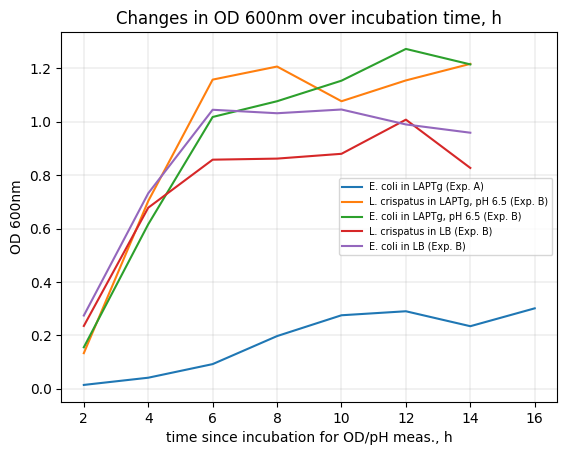

In [4]:
# FILTER COLUMNS WITH REGEX
ax = TS_63_64[list(TS_63_64.filter(regex='OD'))].plot(x = 'time since incubation for OD/pH meas., h', ylabel = 'OD 600nm', title = 'Changes in OD 600nm over incubation time, h')
ax.grid(True, linewidth = 0.25)
ax.legend(['E. coli in LAPTg (Exp. A)', 'L. crispatus in LAPTg, pH 6.5 (Exp. B)',
           'E. coli in LAPTg, pH 6.5 (Exp. B)', 'L. crispatus in LB (Exp. B)', 'E. coli in LB (Exp. B)'],
           fontsize='x-small')

### pH measurements from experiments 63 and 64 - summary plot

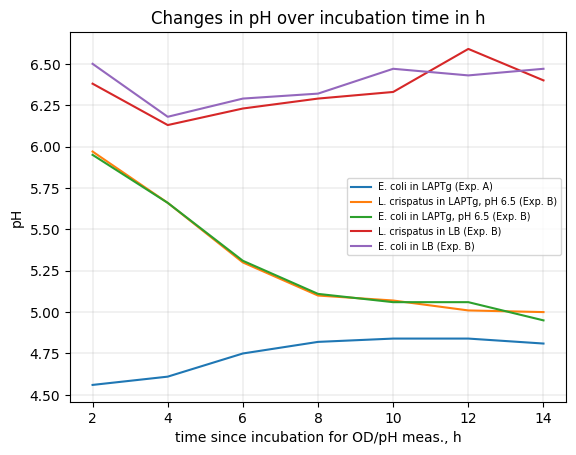

In [6]:
ax = TS_63_64[list(TS_63_64.filter(regex='pH'))].plot(x = 'time since incubation for OD/pH meas., h', ylabel = 'pH', title = 'Changes in pH over incubation time in h')
ax.legend(['E. coli in LAPTg (Exp. A)', 'L. crispatus in LAPTg, pH 6.5 (Exp. B)',
           'E. coli in LAPTg, pH 6.5 (Exp. B)', 'L. crispatus in LB (Exp. B)', 'E. coli in LB (Exp. B)'],
           fontsize='x-small')
ax.grid(True, linewidth = 0.25)
plt.savefig('Experiment_63_64_summary.png')

### Measuremets from experiment 65 - summay plot

* 65_OD_LC_pH_65 - *L. crispatus* in pH 6.5
* 65_OD_LG_pH_65 - *L. gasseri* in pH 6.5
* 65_OD_LC_pH_45 - *L. crispatus* in pH 4.5
* 65_OD_LG_pH_45 - *L. gasseri* in pH 4.5

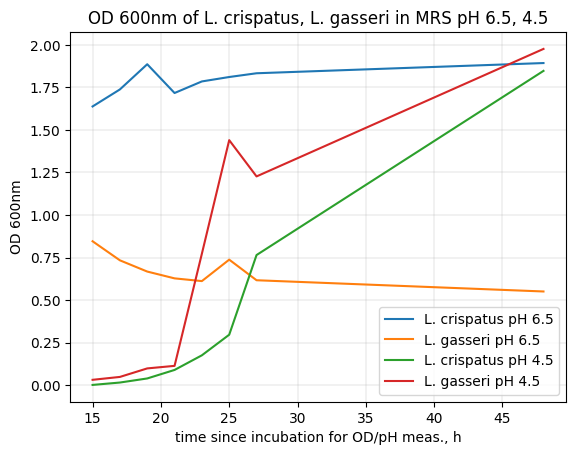

In [18]:
ax = TS_65[list(TS_65.filter(regex='OD'))].plot(x = 'time since incubation for OD/pH meas., h', ylabel = 'OD 600nm', title = 'OD 600nm of L. crispatus, L. gasseri in MRS pH 6.5, 4.5')
ax.legend(['L. crispatus pH 6.5', 'L. gasseri pH 6.5',
            'L. crispatus pH 4.5','L. gasseri pH 4.5'])
ax.grid(True, linewidth = 0.25)
plt.savefig('Experiment_65_summary.png')

## Growth curve fitting
The logistic growth function is defined as:

![Logistic Function](https://andymath.com/wp-content/uploads/2019/08/Logistic-Function.jpg)

In code form, it can be represented like this:

In [9]:
def logistic_growth_function(x, capacity, x_midpoint, growth_rate, offset):
    return capacity / (1 + np.exp(-growth_rate * (x-x_midpoint) ) ) + offset

Using the `curve_fit` function of the `scipy` module, we can approximate the growth rates of bacteria in various conditions.

But first, we need to extract `x` and `y` values from individual growth measurements.

In [10]:
# extract time in hours
x_63_64 = TS_63_64['time since incubation for OD/pH meas., h']
x_65 = [0.0] + (list(TS_65['time since incubation for OD/pH meas., h']))


# extract growth curves as OD values --- i will use the dilution series example from jove to find a better unit for the growth rate later
y_63 = TS_63_64['63_OD_EC']

y_64 = []
y_65 = []
y_64_names = ['64_OD_AL', '64_OD_AE', '64_OD_CL', '64_OD_CE']
y_64_names_proper = ['OD 600nm of L. crispatus in LAPTg, pH 6.5',
                     'OD 600nm of E. coli in LAPTg, pH 6.5',
                     'OD 600nm of L. crispatus in LB',
                     'OD 600nm of E. coli in LB']
y_65_names = ['65_OD_LC_pH_65', '65_OD_LG_pH_65', '65_OD_LC_pH_45', '65_OD_LG_pH_45']

for i in range(0,len(y_64_names)):
  y_64.append(list(TS_63_64[y_64_names[i]]))
  y_64[i].pop()
  y_65.append([0] + list(TS_65[y_65_names[i]]))

Now, we can start finding the function parameters for each curve.

### Experiment 63

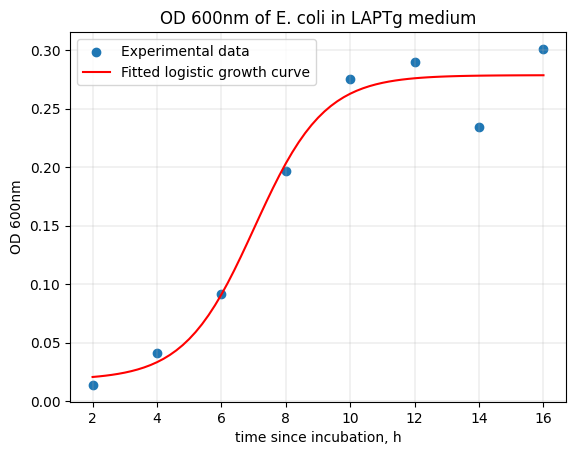

In [17]:
parameter_63, cov_63 = curve_fit(logistic_growth_function, x_63_64, y_63, p0=[8,0.5,0.01,0])

plt.scatter(x_63_64,y_63)
plt.xlabel('time since incubation, h')
plt.ylabel('OD 600nm')
plt.title("OD 600nm of E. coli in LAPTg medium")
super_x = [num for num in np.arange(min(x_63_64),max(x_63_64)+0.2,0.2)]
super_y = [logistic_growth_function(s, *parameter_63) for s in super_x]
plt.plot(super_x, super_y, 'r-')
plt.legend(['Experimental data', 'Fitted logistic growth curve'])
plt.grid(True, linewidth = 0.25)

plt.savefig('smooth_Growth_curve_Experiment_63.png')


### Experiment 64

In [16]:
parameters_64 = []
cov_64 = []
y_64_curves = []

parameters_65 = []
cov_65 = []
y_65_curves = []

# in one loop - obtain parameters per column of measurements and OD values for growth curve

for i in range(0, len(y_64)):
  # obtaining growth curves parameters for results exp 64, 65
  print(y_64_names[i])
  p_curr, c_curr = curve_fit(logistic_growth_function, list(x_63_64)[0:-1], y_64[i], p0=[2,0.5,0.01,0])
  parameters_64.append(p_curr)
  cov_64.append(c_curr)

  # obtaining OD values for Exp. 64 growth curve based on obtained parameters

  plt.scatter(list(x_63_64)[0:-1],y_64[i], label='Experimental data')
  plt.xlabel('time since incubation, h')
  plt.ylabel('OD 600nm')
  super_x = [num for num in np.arange(min(x_63_64),max(x_63_64)+0.2,0.2)]
  super_y = [logistic_growth_function(s, *parameters_64[i]) for s in super_x]
  plt.plot(super_x, super_y, 'r-', label='Fitted function')
  pltname = 'smooth_Growth_curve_experiment_'+ y_64_names[i]+'.png'
  plt.title(y_64_names_proper[i])
  plt.grid(True, linewidth = 0.25)
  plt.legend(['Experimental data', 'Fitted logistic growth curve'])
  plt.savefig(pltname)
  plt.clf()


64_OD_AL
64_OD_AE
64_OD_CL
64_OD_CE


<Figure size 640x480 with 0 Axes>

In [94]:
''' FAILED CURVE ESTIMATION - SEE SUMMARY PLOT OF EXPERIMENT 65
for i in range(0, len(y_65)):

  print(y_65_names[i])
  p_curr, c_curr = curve_fit(logistic_growth_function, x_65, y_65[i], p0=[2,.1,15,2])
  parameters_65.append(p_curr)
  cov_65.append(c_curr)

  #obtaining OD values for Exp. 65 growth curve based on obtaied parameters
  y_65_curves.append([logistic_growth_function(x, *parameters_65[i]) for x in x_65])
  plt.scatter(list(x_65),y_65[i], label='Experimental data')
  plt.plot(list(x_65),y_65_curves[i], 'r-', label='Fitted function')
  plt.xlabel('time since incubation, h')
  plt.ylabel('OD 600nm')
  super_x = [num for num in np.arange(min(x_65),max(x_65),0.2)]
  super_y = [logistic_growth_function(s, *parameters_65[i]) for s in super_x]
  #plt.plot(super_x, super_y, 'r-', label='Fitted function')
  pltname = 'Growth_curve_experiment_'+ y_65_names[i]+'.png'
  plt.legend(['Fitted logistic growth curve', 'Experimental data'])
  plt.title(pltname[0:-4])
  plt.savefig(pltname)
  plt.clf()
'''

65_OD_LC_pH_65
65_OD_LG_pH_65


<ipython-input-8-9714e0201c6c>:2: RuntimeWarning: overflow encountered in exp
  return capacity / (1 + np.exp(-growth_rate * (x-x_midpoint) ) ) + offset
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-8-9714e0201c6c>:2: RuntimeWarning: overflow encountered in exp
  return capacity / (1 + np.exp(-growth_rate * (x-x_midpoint) ) ) + offset
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


65_OD_LC_pH_45
65_OD_LG_pH_45


<Figure size 640x480 with 0 Axes>